##This dataset is about determining the level of each diabetes patients

##It was also observed that the dataset is labelled hence we must use supervised learning algorithm and with the output variable being categorical, we can try classification algorithm.

##Will be implementing KNN,SVM and logistic regression algorithms and comparing three accuracy scores

#1. Start by importing all necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
from sklearn import metrics

#2. Import dataset

In [2]:
data = pd.read_csv(r'D:\DataScience\Data\ML Data\diabetes database.csv')
df=pd.DataFrame(data)
print(df.to_string())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0  33.6                     0.627   50        1
1              1       85             66             29        0  26.6                     0.351   31        0
2              8      183             64              0        0  23.3                     0.672   32        1
3              1       89             66             23       94  28.1                     0.167   21        0
4              0      137             40             35      168  43.1                     2.288   33        1
5              5      116             74              0        0  25.6                     0.201   30        0
6              3       78             50             32       88  31.0                     0.248   26        1
7             10      115              0              0        0  35.3                     0.134   29        0
8

#3. Select features for x and y

In [3]:
x =df.iloc[:, 0:-1].values # independent variable
y =df.iloc[:, -1].values # dependant variable

#4. Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#5. Since the values are in different decimal scales, we do feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#6. Fitting Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
df2=pd.DataFrame(x_test)
print(df2.to_string)

<bound method DataFrame.to_string of             0         1         2         3         4         5         6  \
0   -0.829864  2.457628  0.332499  1.365830 -0.718238  1.344205  2.786654   
1   -0.537687 -0.446931  0.227211  0.554072  0.134938  0.174910 -0.194347   
2    0.046667 -1.425641 -0.404519 -1.319215 -0.718238  0.225202 -0.233492   
3    0.338844  1.415775  0.121922 -0.132800  0.774820 -0.805790  0.356686   
4   -1.122041 -0.320646 -0.246587 -1.319215 -0.718238 -0.956667  0.576497   
..        ...       ...       ...       ...       ...       ...       ...   
187  0.631021  0.089781  0.121922 -1.319215 -0.718238 -0.579474 -0.302747   
188 -0.537687  0.721207 -0.615096  0.741401  0.433549 -0.076552 -0.140147   
189 -0.829864 -0.383789 -0.509808 -0.819672  0.834542 -0.856082  1.440686   
190 -0.245510  0.216066  0.437788 -1.319215 -0.718238 -1.396724 -0.603859   
191  0.338844 -1.046786  0.437788  0.554072 -0.718238 -0.579474 -0.633970   

            7  
0   -0.965849  
1   -0

#7. Predicting the Test set results

In [7]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df2.to_string())

     Actual  Predicted
0         1          1
1         0          0
2         0          0
3         1          1
4         0          0
5         0          0
6         1          1
7         1          1
8         0          0
9         0          0
10        1          1
11        1          1
12        0          0
13        0          0
14        0          0
15        0          0
16        1          1
17        0          0
18        0          0
19        0          0
20        1          1
21        1          0
22        0          0
23        0          0
24        0          0
25        0          0
26        0          0
27        0          1
28        0          0
29        0          0
30        0          0
31        0          0
32        0          0
33        0          0
34        0          0
35        1          1
36        1          0
37        0          0
38        0          0
39        0          1
40        0          0
41        0          0
42        0

#8. Evaluating Algorithm

In [8]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
acc1=metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy:",acc1)

Mean Absolute Error: 0.19791666666666666
Mean Squared Error: 0.19791666666666666
Root Mean Squared Error: 0.44487826050130463
Accuracy: 80.20833333333334


#9. Fitting K-Nearest Neighbour Algorithm

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

#10. Predicting the Test set results

In [10]:
y_pred= classifier.predict(x_test)
print("Prediction comparison")
ddf=pd.DataFrame({"Y_test":y_test,"Y-pred":y_pred})
print(ddf.to_string())

Prediction comparison
     Y_test  Y-pred
0         1       1
1         0       0
2         0       0
3         1       0
4         0       0
5         0       0
6         1       0
7         1       1
8         0       0
9         0       0
10        1       0
11        1       0
12        0       0
13        0       0
14        0       0
15        0       0
16        1       1
17        0       0
18        0       0
19        0       0
20        1       0
21        1       0
22        0       0
23        0       0
24        0       0
25        0       0
26        0       0
27        0       1
28        0       0
29        0       0
30        0       0
31        0       0
32        0       0
33        0       1
34        0       0
35        1       0
36        1       0
37        0       0
38        0       0
39        0       1
40        0       0
41        0       0
42        0       0
43        1       1
44        1       1
45        0       0
46        0       0
47        1       

#11. Evaluating Algorithm

In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
acc2 = accuracy_score(y_test, y_pred)*100
print('Accuracy: ',acc2)

Mean Absolute Error: 0.22395833333333334
Mean Squared Error: 0.22395833333333334
Root Mean Squared Error: 0.4732423621500228
Accuracy:  77.60416666666666


#12. Fitting Support Vector Machine Algorithm

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

#13. Predicting the Test set results

In [13]:
y_pred= classifier.predict(x_test)
df2=pd.DataFrame({"Actual Y_Test":y_test,"Prediction Data":y_pred})
print("prediction status")
print(df2.to_string())

prediction status
     Actual Y_Test  Prediction Data
0                1                1
1                0                0
2                0                0
3                1                1
4                0                0
5                0                0
6                1                1
7                1                1
8                0                0
9                0                0
10               1                1
11               1                1
12               0                0
13               0                0
14               0                0
15               0                0
16               1                1
17               0                0
18               0                0
19               0                0
20               1                1
21               1                0
22               0                0
23               0                0
24               0                0
25               0                0
26        

#14. Evaluating Algorithm

Mean Absolute Error: 0.19791666666666666
Mean Squared Error: 0.19791666666666666
Root Mean Squared Error: 0.44487826050130463
Accuracy: 80.20833333333334


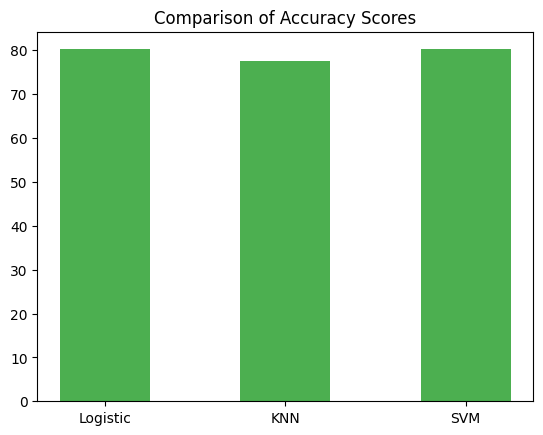

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
acc3 = accuracy_score(y_test, y_pred)*100
print('Accuracy:',acc3)

x = np.array(["Logistic", "KNN", "SVM"])
y = np.array([acc1,acc2,acc3])
mtp.bar(x, y, color="#4CAF50", width=0.5)
mtp.title('Comparison of Accuracy Scores')
mtp.show()